# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 

#load the titanic data from kaggle

In [2]:
data=pd.read_csv("G:/datasc/DATA/train.csv")
data.head(-5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [3]:
data.shape,data.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.select_dtypes("object")

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


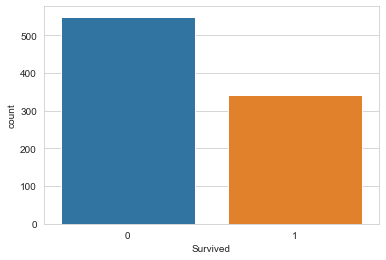

In [7]:
sns.set_style('whitegrid')
_=sns.countplot(x='Survived',data=data)

#How many male and female survived 

C:\Users\simanchala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


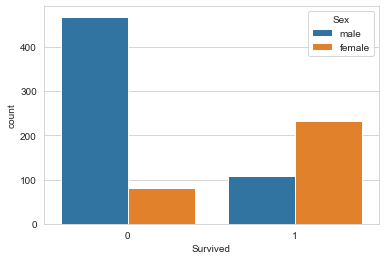

In [8]:
sns.set_style("whitegrid")
_=sns.countplot(data["Survived"],hue=data["Sex"])

#By looking this countplot most of male not survived than female

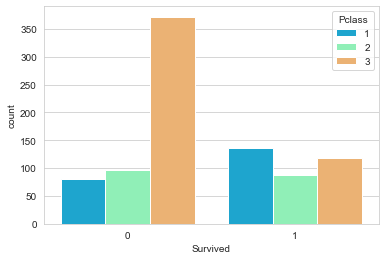

In [9]:
sns.set_style('whitegrid')
_=sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

In [10]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

608 people have no siblings 
209 people have 1 siblings
28 people have 2 siblings
18 people have 4 siblings
16 people have 3 siblings
7 people have 8 siblings 
only 5 people have 5 siblings

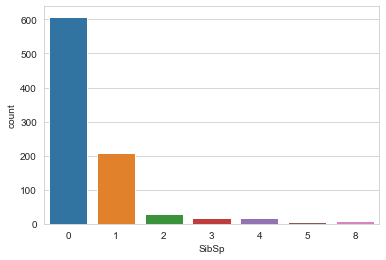

In [13]:
_=sns.countplot(x='SibSp',data=data)

# EDA


Missing values:

<AxesSubplot:>

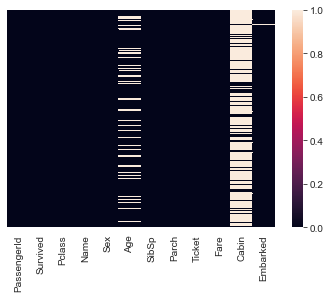

In [14]:
sns.heatmap(data.isnull(),yticklabels=False)

Age and Cabin has null values 

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows.

In [16]:
data.drop('Cabin',axis=1,inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


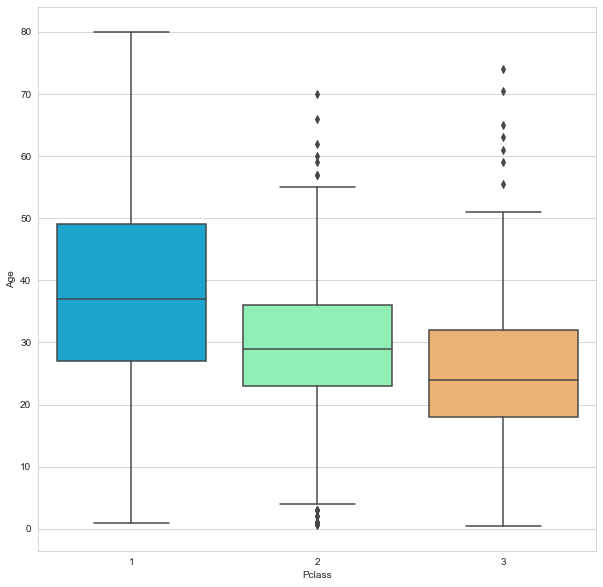

In [18]:
plt.figure(figsize=(10,10))
_=sns.boxplot(x='Pclass',y='Age',data=data,palette='rainbow')

In [19]:
data.groupby('Pclass').mean()[['Age']]


,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [20]:
def missing_age(age):
    Age=age[0]
    Pclass=age[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age

In [21]:
data['Age']=data[['Age','Pclass']].apply(missing_age,axis=1)

In [22]:
data['Embarked'].fillna(method='bfill',inplace=True)

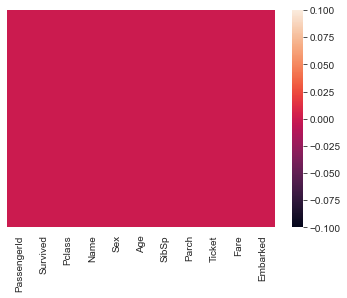

In [23]:
_=sns.heatmap(data.isnull(),yticklabels=False)

<AxesSubplot:>

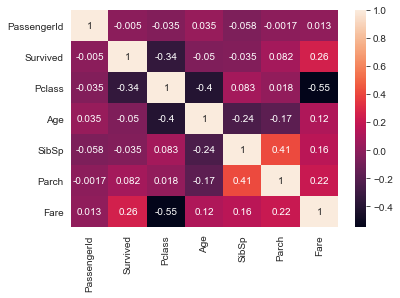

In [24]:
sns.heatmap(data.corr(),annot=True)

In [25]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035388,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.050118,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.403923,0.083081,0.018443,-0.549500
Age,0.035388,-0.050118,-0.403923,1.000000,-0.243110,-0.174824,0.121503
SibSp,-0.057527,-0.035322,0.083081,-0.243110,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.174824,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.121503,0.159651,0.216225,1.000000


In [29]:
survive=data[data['Survived']==1]

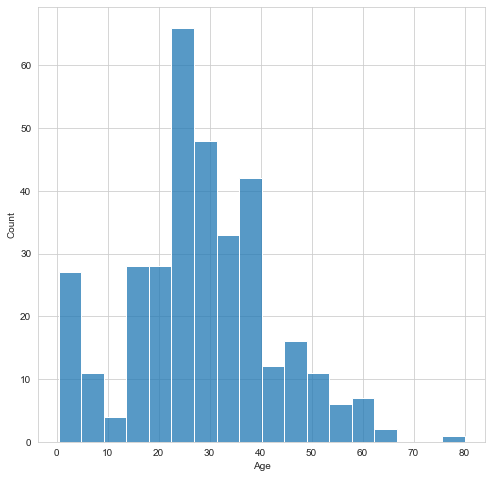

In [30]:
plt.figure(figsize=(8,8))
_=sns.histplot(survive['Age'])

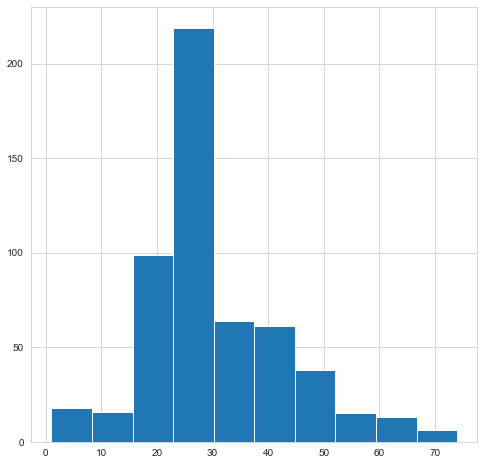

In [32]:
plt.figure(figsize=(8,8))
_=plt.hist('Age',data=data[data['Survived']==0])

In [33]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [34]:
sex,embark

(     male
 0       1
 1       0
 2       0
 3       0
 4       1
 ..    ...
 886     1
 887     0
 888     0
 889     1
 890     1
 
 [891 rows x 1 columns],
      Q  S
 0    0  1
 1    0  0
 2    0  1
 3    0  1
 4    0  1
 ..  .. ..
 886  0  1
 887  0  1
 888  0  1
 889  0  0
 890  1  0
 
 [891 rows x 2 columns])

In [35]:
data2=data.drop(['Sex','Embarked','Name','Ticket'],axis=1)
data2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [36]:
data2=pd.concat([data2,sex,embark],axis=1)

In [37]:
data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.252716,0.523008,0.381594,32.204208,0.647587,0.086420,0.723906
std,257.353842,0.486592,0.836071,13.211959,1.102743,0.806057,49.693429,0.477990,0.281141,0.447315
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


#split the data for training and testing

In [39]:
X=data2.drop('Survived',axis=1)
y=data2['Survived']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, 
                                                    random_state=10)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 9), (268, 9), (623,), (268,))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\simanchala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
predictions = logmodel.predict(X_test)
print(accuracy_score(y_test,predictions))

0.8097014925373134


In [50]:
confusion_matrix(y_test,predictions)

array([[154,  20],
       [ 31,  63]], dtype=int64)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       174
           1       0.76      0.67      0.71        94

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.81      0.81      0.81       268

